In [483]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import unique
import json
from pandas.io.json import json_normalize
import seaborn as sns

In [506]:
sd = pd.read_csv('SpDat.csv')
sd = pd.DataFrame(sd)
sd = sd[['iid','pid','gender','age','field_cd','race','imprace','imprelig','date','go_out','exphappy','attr','sinc','intel','fun','like','dec','age_o','race_o','attr_o','sinc_o','intel_o','fun_o','dec_o','samerace','int_corr','match','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1','sports','theater','clubbing','tv','gaming','yoga']]
sd.head()

,iid,pid,gender,age,field_cd,race,imprace,imprelig,date,go_out,...,intel1_1,fun1_1,amb1_1,shar1_1,sports,theater,clubbing,tv,gaming,yoga
0,1,11.0,0,21.0,1.0,4.0,2.0,4.0,7.0,1.0,...,20.0,15.0,15.0,15.0,9.0,1.0,5.0,9.0,1.0,1.0
1,1,12.0,0,21.0,1.0,4.0,2.0,4.0,7.0,1.0,...,20.0,15.0,15.0,15.0,9.0,1.0,5.0,9.0,1.0,1.0
2,1,13.0,0,21.0,1.0,4.0,2.0,4.0,7.0,1.0,...,20.0,15.0,15.0,15.0,9.0,1.0,5.0,9.0,1.0,1.0
3,1,14.0,0,21.0,1.0,4.0,2.0,4.0,7.0,1.0,...,20.0,15.0,15.0,15.0,9.0,1.0,5.0,9.0,1.0,1.0
4,1,15.0,0,21.0,1.0,4.0,2.0,4.0,7.0,1.0,...,20.0,15.0,15.0,15.0,9.0,1.0,5.0,9.0,1.0,1.0


In [507]:
pd.DataFrame(sd.columns.values.reshape(13,3))

,0,1,2
0,iid,pid,gender
1,age,field_cd,race
2,imprace,imprelig,date
3,go_out,exphappy,attr
4,sinc,intel,fun
5,like,dec,age_o
6,race_o,attr_o,sinc_o
7,intel_o,fun_o,dec_o
8,samerace,int_corr,match
9,attr1_1,sinc1_1,intel1_1


In [514]:
#drop nulls
sd= sd.dropna()
#filter out those who had less than 5 total dates.
datecount= pd.DataFrame(sd.groupby('iid').count())
datecount= datecount['pid']
datecount = datecount.reset_index()
datecount.columns = [['iid','datecount']]
sd = pd.merge(sd,datecount)
sd = sd[sd['datecount']>4]
sd.shape

(7263, 40)

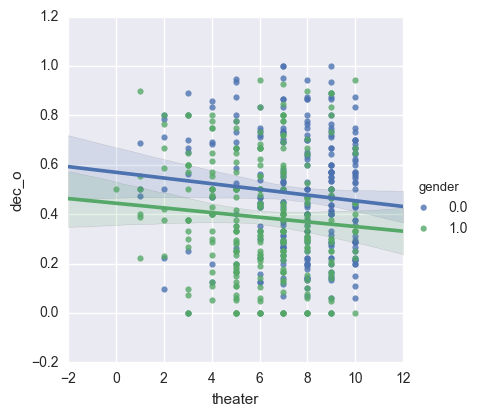

In [515]:
by_person = sd.pivot_table(index=sd['iid'])
by_person= by_person.reset_index()
fig = plt.figure()

sns.lmplot(x="theater", y="dec_o", hue="gender", data=by_person, fit_reg=True,size=4.25)

In [554]:
gamers = by_person['iid'][by_person['attr_o'] > 6]

only_gamers = sd[sd.iid.isin(gamers)]
only_gamers = only_gamers[only_gamers.pid.isin(gamers)]
only_gamers['dec_o'].describe()


count    2199.000000
mean        0.548886
std         0.497718
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: dec_o, dtype: float64

In [555]:
the_gamers = by_person[by_person.iid.isin(gamers)]
the_gamers['dec_o'].describe()

count    294.000000
mean       0.577877
std        0.193792
min        0.000000
25%        0.439236
50%        0.571429
75%        0.722222
max        1.000000
Name: dec_o, dtype: float64

In [548]:
sd['dec_o'].describe()

count    7263.000000
mean        0.434256
std         0.495693
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dec_o, dtype: float64

In [518]:
sd['field_cd'].value_counts()

8.0     1647
10.0     926
5.0      739
13.0     639
1.0      600
3.0      591
9.0      565
11.0     388
6.0      274
7.0      223
2.0      172
15.0     149
4.0      129
14.0     116
18.0      45
16.0      33
12.0      18
17.0       9
Name: field_cd, dtype: int64